# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

In [8]:
import glob

globber = glob.glob("state*.csv")

list_of_files = []
for each_file in globber:
    list_of_files.append(pd.read_csv(each_file))

df = pd.concat(list_of_files)

df = df.sort_values(by="State")

2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

globber = glob.glob("state*.csv")

list_of_files = []
for each_file in globber:
    list_of_files.append(pd.read_csv(each_file))

df = pd.concat(list_of_files)

df = df.sort_values(by="State")

3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [9]:
df.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [11]:
df.drop(columns = "Unnamed: 0", inplace=True)

In [12]:
df.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [14]:
df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [20]:
df.Income = df.Income.replace('[\$,]', '', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/var/folders/75/8cznfb4d2j56mrdwqyh36s3w0000gn/T/ipykernel_13109/4210018751.py:1: SyntaxWarning: invalid escape sequence '\$'
  df.Income = df.Income.replace('[\$,]', '', regex=True)


In [24]:
df.Income = df.Income.astype(float)

6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [45]:
split_df = df.GenderPop.str.split('(\d+)', expand=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/75/8cznfb4d2j56mrdwqyh36s3w0000gn/T/ipykernel_13109/3376499298.py:1: SyntaxWarning: invalid escape sequence '\d'
  split_df = df.GenderPop.str.split('(\d+)', expand=True)


In [ ]:
split_df.drop(columns=0,inplace=True)

In [49]:
df[["MalePop", "Male", "FemalePop", "Female"]] = split_df

In [52]:
df.drop(columns = ["GenderPop","Male","Female"], inplace=True)

7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [58]:
df.MalePop = df.MalePop.astype(int)

In [82]:
df.FemalePop = df.FemalePop.fillna(0)

In [83]:
df.FemalePop = df.FemalePop.astype(int)

In [78]:
for each in df.FemalePop:
    print(type(each))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [84]:
df

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093,2489527
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160,349215
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088,3342840
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913,1506295
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135,19334329
5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.80,2648667,2630239
6,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,76146.56,1751607,1841615
7,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,61827.98,448413,478041
8,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,75466.36,306674,340810
9,Florida,19645772,21.34%,59.08%,15.17%,0.21%,2.28%,0.05%,50690.19,9600009,10045763


8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

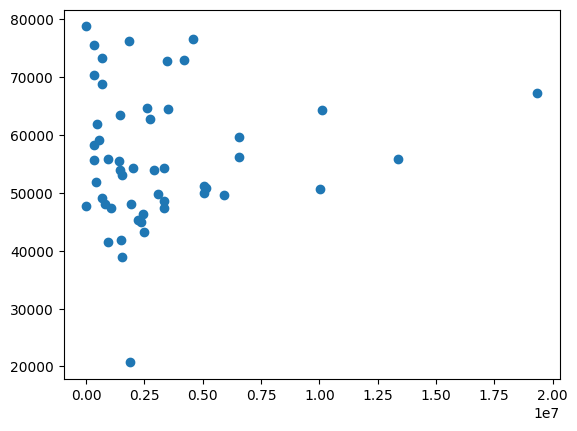

In [85]:
plt.scatter(df.FemalePop, df.Income)

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [86]:
df.head(3)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093,2489527
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160,349215
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088,3342840


In [88]:
df.FemalePop = df.apply(lambda x: (x.TotalPop - x.MalePop) if x.FemalePop == 0 else x.FemalePop  , axis =1)

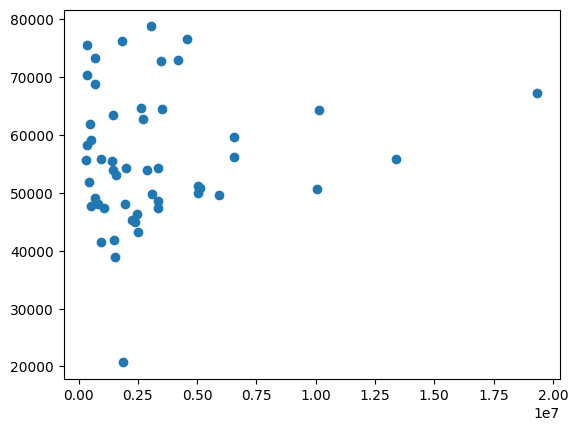

In [89]:
plt.scatter(df.FemalePop, df.Income)

10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [90]:
df.duplicated().value_counts()

False    51
Name: count, dtype: int64

11. Drop those duplicates using the `.drop_duplicates()` function.

In [ ]:
df.drop_duplicates(subset="State",inplace=True)
df = df.reset_index().drop(columns="index")

12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

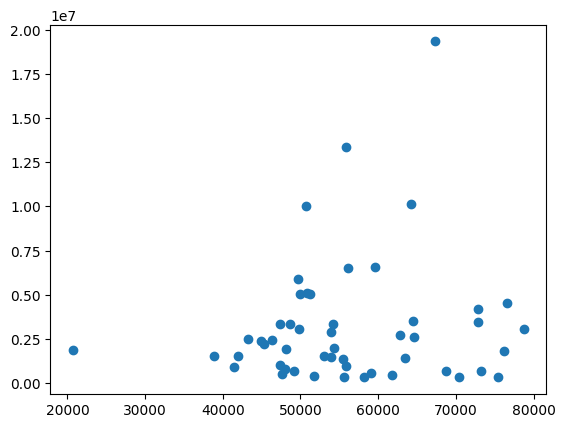

In [91]:
plt.scatter(df.Income, df.FemalePop)

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [92]:
df.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'MalePop', 'FemalePop'],
      dtype='object')

In [93]:
df.head(3)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093,2489527
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160,349215
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088,3342840


14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

In [115]:
for each_column in df.iloc[:,2:-3].columns:
    df[each_column] = df[each_column].str.strip("%").astype(float)

In [123]:
df.isnull().sum()

State        0
TotalPop     0
Hispanic     0
White        0
Black        0
Native       0
Asian        0
Pacific      4
Income       0
MalePop      0
FemalePop    0
dtype: int64

Thought Process:

Find the remaining population percent

100 - existing population percent

Estimate that 25% of population gap is Pacific

Fill Nulls in Pacific with 25% of the remaining population in that state

NOTE: Pacific population for a specific state is highly correlated with Asian population for a state.
This could be a good candidate to fill in Null values based on linear interpolation

In [160]:
df["pacific_pop_estimate"] = df.apply(lambda x:  (100 - (x.Hispanic + x.White + x.Black + x.Native + x.Asian)) * 0.25, axis=1)

In [176]:
df.loc[(df.Pacific.isnull())].apply(lambda x: x.fillna(x.pacific_pop_estimate), axis=1)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop,non_pacific_pop,pacific_pop_estimate


In [177]:
df.loc[(df.Pacific.isnull())] = df.loc[(df.Pacific.isnull())].apply(lambda x: x.fillna(x.pacific_pop_estimate), axis=1)

In [178]:
df.isnull().sum()

State                   0
TotalPop                0
Hispanic                0
White                   0
Black                   0
Native                  0
Asian                   0
Pacific                 0
Income                  0
MalePop                 0
FemalePop               0
non_pacific_pop         0
pacific_pop_estimate    0
dtype: int64

In [189]:
df = df.drop(columns = ["non_pacific_pop", "pacific_pop_estimate"])

In [171]:
df.corr(numeric_only=True)

,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop,non_pacific_pop,pacific_pop_estimate
TotalPop,1.000000,0.283525,-0.297047,0.100797,-0.248176,0.185682,-0.112024,0.120422,0.999921,0.999925,0.107280,-0.107280
Hispanic,0.283525,1.000000,-0.709392,-0.216488,0.000186,0.046918,-0.026552,-0.232250,0.284258,0.282767,0.090290,-0.090290
White,-0.297047,-0.709392,1.000000,-0.341264,0.027205,-0.424827,-0.328124,-0.013260,-0.295883,-0.298137,0.285575,-0.285575
Black,0.100797,-0.216488,-0.341264,1.000000,-0.309856,-0.102373,-0.171839,0.008675,0.095790,0.105663,0.183803,-0.183803
Native,-0.248176,0.000186,0.027205,-0.309856,1.000000,-0.089420,0.015407,0.003762,-0.245196,-0.251043,-0.146523,0.146523
Asian,0.185682,0.046918,-0.424827,-0.102373,-0.089420,1.000000,0.904319,0.489754,0.187345,0.184032,-0.892149,0.892149
Pacific,-0.112024,-0.026552,-0.328124,-0.171839,0.015407,0.904319,1.000000,0.259046,-0.109895,-0.114085,-0.964243,0.964243
Income,0.120422,-0.232250,-0.013260,0.008675,0.003762,0.489754,0.259046,1.000000,0.121653,0.119203,-0.322113,0.322113
MalePop,0.999921,0.284258,-0.295883,0.095790,-0.245196,0.187345,-0.109895,0.121653,1.000000,0.999692,0.105002,-0.105002
FemalePop,0.999925,0.282767,-0.298137,0.105663,-0.251043,0.184032,-0.114085,0.119203,0.999692,1.000000,0.109484,-0.109484


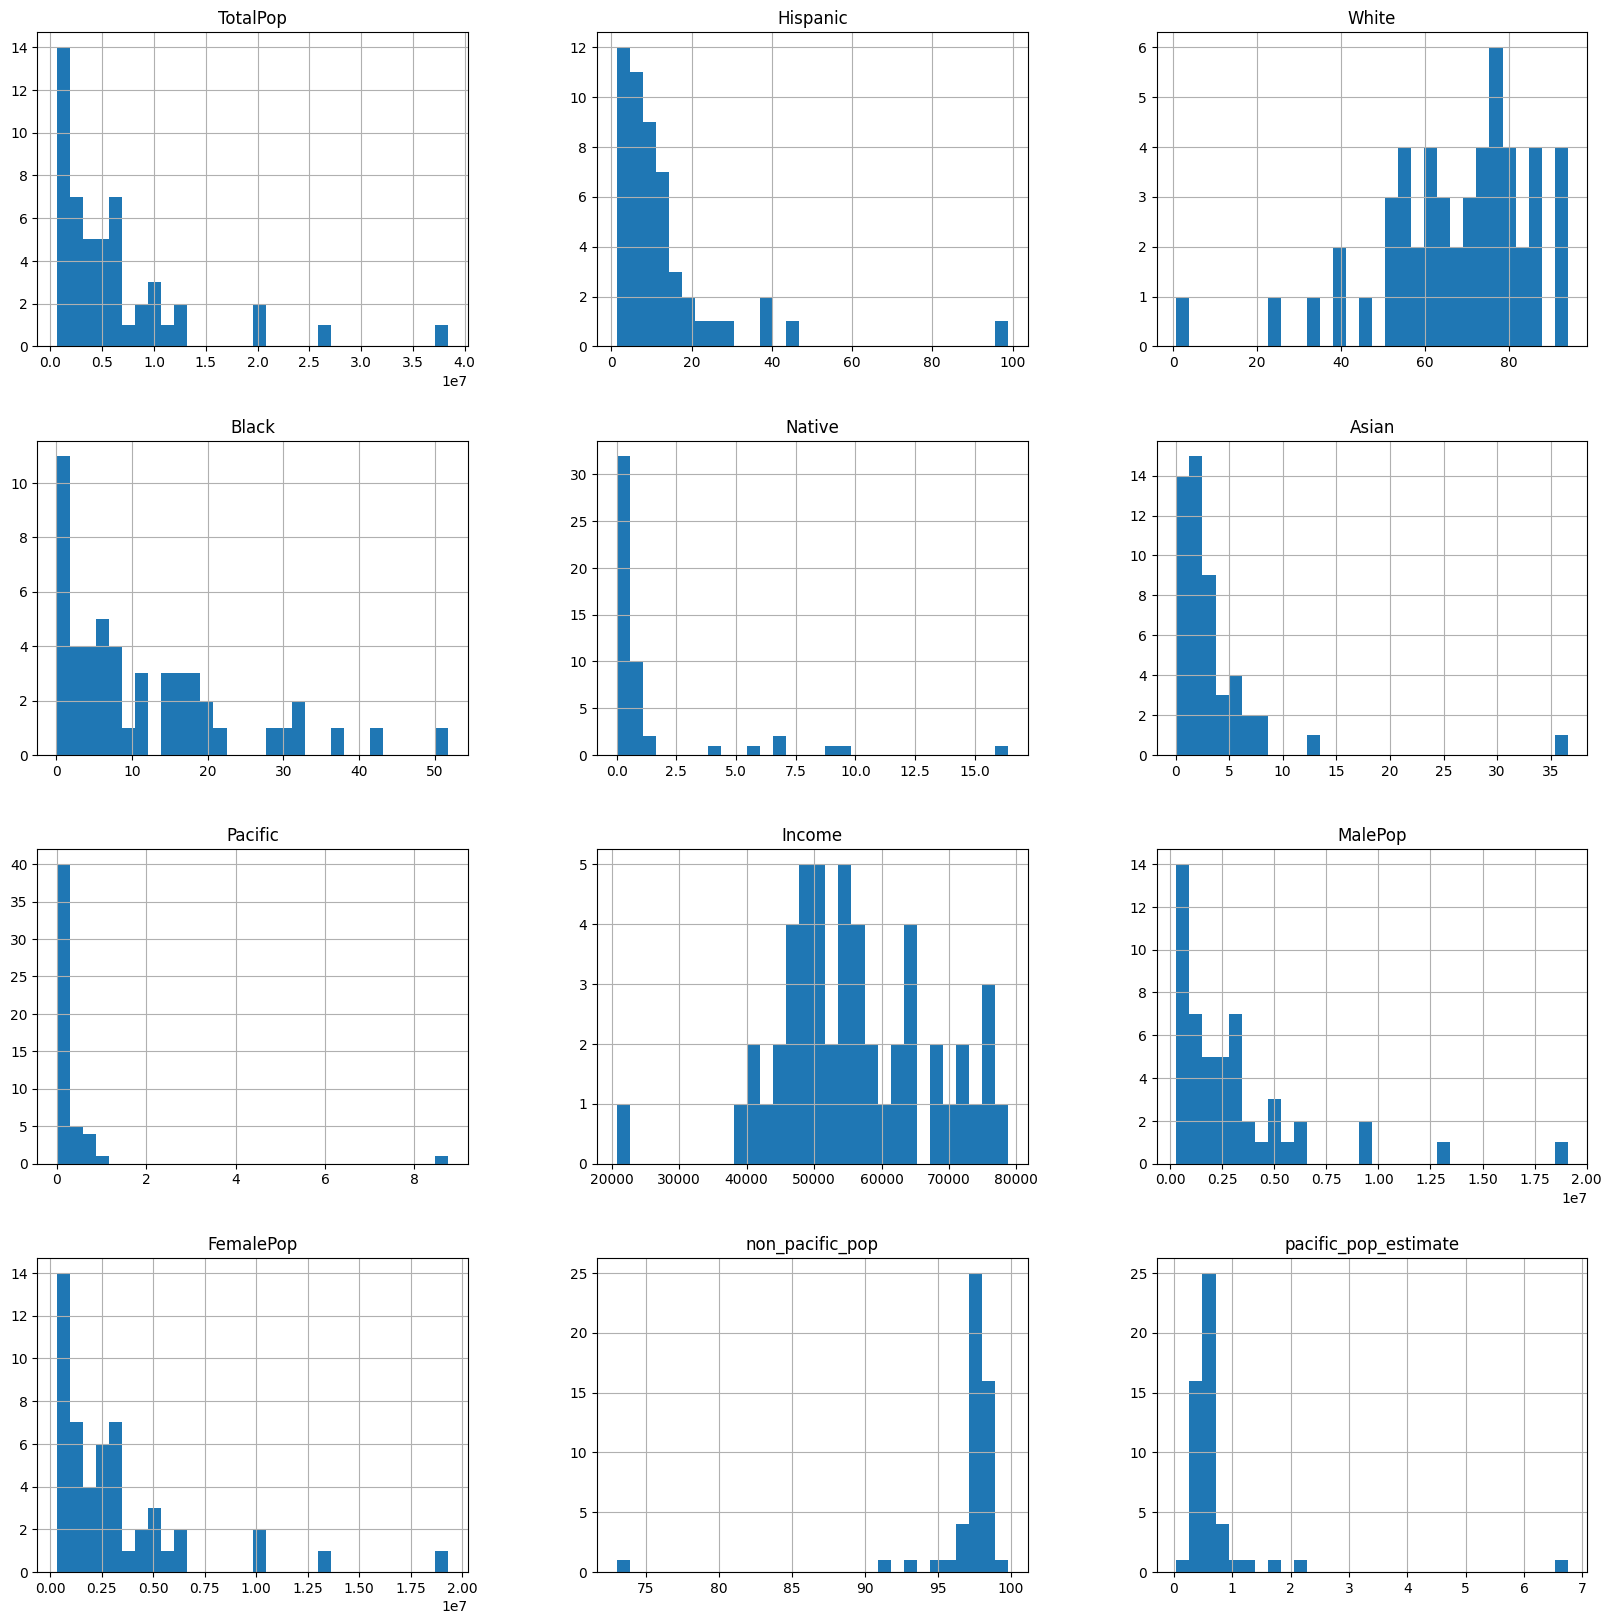

In [182]:
df.hist(bins=30, figsize=(20,20));

## Get Creative

15. Phew. You've definitely impressed your boss on your first day of work.

    But is there a way you really convey the power of pandas and Python over the drudgery of `csv` and Excel?
    
    Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you've been searching for.

In [203]:
df[(df.Hispanic > 25)]

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329
28,Nevada,2798636,27.10,53.24,7.74,1.09,7.10,0.57,55526.53,1407735,1390901
31,New Mexico,2084117,45.28,40.70,1.76,9.25,1.23,0.04,47329.97,1032414,1051703
39,Puerto Rico,3583073,98.89,0.77,0.09,0.00,0.08,0.00,20720.54,1713860,1869213
44,Texas,26538614,38.05,44.69,11.65,0.26,3.67,0.07,55874.52,13171316,13367298


In [202]:
df[(df.Pacific > 1)]

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
11,Hawaii,1406299,9.19,25.03,2.05,0.14,36.59,8.76,73264.43,709871,696428


In [210]:
df["PercentFemale"] = df.apply(lambda x: round((x.FemalePop/x.TotalPop)* 100,2), axis=1)

In [214]:
df[df.PercentFemale > 50]

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop,PercentFemale
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.0300,43296.36,2341093,2489527,51.54
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.1700,54207.82,3299088,3342840,50.33
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.1500,41935.63,1451913,1506295,50.92
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.3500,67264.78,19087135,19334329,50.32
6,Connecticut,3593222,15.60,67.68,10.35,0.13,4.02,0.0200,76146.56,1751607,1841615,51.25
7,Delaware,926454,8.82,64.63,20.74,0.26,3.27,0.5700,61827.98,448413,478041,51.60
8,District of Columbia,647484,9.17,33.10,51.78,0.20,3.38,0.0300,75466.36,306674,340810,52.64
9,Florida,19645772,21.34,59.08,15.17,0.21,2.28,0.0500,50690.19,9600009,10045763,51.13
10,Georgia,10006693,8.42,54.29,32.09,0.19,3.10,0.0500,50811.08,4883331,5123362,51.20
13,Illinois,12873761,15.60,60.86,17.11,0.12,4.48,0.0200,59587.05,6316899,6556862,50.93


In [215]:
df["PercentMale"] = df.apply(lambda x: round((x.MalePop/x.TotalPop)* 100,2), axis=1)

In [217]:
df[df.PercentMale > 50].count()

State            9
TotalPop         9
Hispanic         9
White            9
Black            9
Native           9
Asian            9
Pacific          9
Income           9
MalePop          9
FemalePop        9
PercentFemale    9
PercentMale      9
dtype: int64

In [218]:
total_female = df.FemalePop.sum()

In [219]:
total_female

162365836

In [220]:
total_male = df.MalePop.sum()

In [223]:
round((total_female / (total_male + total_female))* 100, 2)

50.82

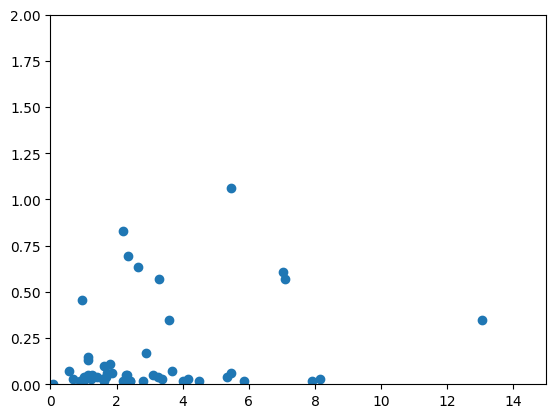

In [241]:
plt.xlim(0, 15)
plt.ylim(0,2)
plt.scatter(df.Asian, df.Pacific)

In [248]:
#df[["State", "Income"]].sort_values(by="Income", ascending=False)

In [249]:
#df[["State", "TotalPop"]].sort_values(by="TotalPop", ascending=False)

,State,TotalPop
4,California,38421464
44,Texas,26538614
32,New York,19673174
9,Florida,19645772
13,Illinois,12873761
38,Pennsylvania,12779559
35,Ohio,11575977
10,Georgia,10006693
22,Michigan,9900571
33,North Carolina,9845333
